<div style="border:solid Chocolate 2px; padding: 40px">

<b>Денис, привет!👋</b>

Меня зовут Ольга Оглезнева, тимлид, я буду проверять эту (как наверное и все) части твоего проекта. 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

# Прогноз оттока клиентов оператора связи "Ниединогоразрыва.ком".

**Финальный спринт домена "Телеком".**

**Выполнил студент когорты 36_DS Таширев Денис.**

## Общая информация о задаче и входных данных

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
 Молодец, что не забываешь про заголовок и описание, это важно, так и самому удобнее работать, когда они всегда на виду, так и другим будет проще понять, что происходит в твоей тетради :)
</div>

## Обзор данных

### Загрузка данных

Подключим необходимые библиотеки и выполним базовые настройки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
RANDOM_STATE = 120922

Данные предоставлены в виде csv файлов, произведем их загрузку, в атрибуты добавим название таблицы.

In [2]:
contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
contract_df.attrs = {'name':'contract_df'}
personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
personal_df.attrs = {'name':'personal_df'}
internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
internet_df.attrs = {'name':'internet_df'}
phone_df = pd.read_csv('/datasets/final_provider/phone.csv')
phone_df.attrs = {'name':'phone_df'}

### Посмотрим информацию по загруженным таблицам.

In [3]:
# функция вывода информации о датафрейме

def df_view(table):
    print('\n','*'*30, table.attrs['name'],'*'*30)
    display(table.head())
    display(table.describe())
    print(table.info())

In [4]:
for df in (contract_df, personal_df, internet_df, phone_df):
    df_view(df)


 ****************************** contract_df ******************************


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

 ****************************** personal_df ******************************


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

 ****************************** internet_df ******************************


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

 ****************************** phone_df ******************************


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


### Описание структуры данных:

Данные предоставлены в четырёх таблицах.

1. `contract_df` - информация о договоре
    - customerID — уникальный идентификатор пользователя
    - BeginDate — дата заключения договора
    - EndDate — дата расторжения договора
    - Type - тип договора: ежемесячный, годовой и т.д.
    - PaperlessBilling — безбумажный расчёт (УТОЧНИТЬ ЗНАЧЕНИЕ ПОЛЯ!)
    - PaymentMethod — способ оплаты
    - MonthlyCharges — размер ежемесячного платежа
    - TotalCharges — сумма всех платежей


2. `personal_df` - персональные данные клиента
    - customerID — уникальный идентификатор пользователя
    - gender — пол клиента
    - SeniorCitizen — статус пенсионер
    - Partner — партнёрская программа (УТОЧНИТЬ ЗНАЧЕНИЕ ПОЛЯ!)
    - Dependents - зависимость (УТОЧНИТЬ ЗНАЧЕНИЕ ПОЛЯ!)
    
    
3. `internet_df` - информация об интернет-услугах
    - customerID — уникальный идентификатор пользователя
    - InternetService — способ подключения интернета
    - OnlineSecurity — подключена услуга "блокировка небезопасных сайтов"
    - OnlineBackup — подключена услуга "облачное хранилище данных"
    - DeviceProtection — подключена услуга "антивирус" 
    - TechSupport — подключена услуга "выделенная линия технической поддержки"
    - StreamingTV — подключена услуга "стримминговое телевидение"
    - StreamingMovies — подключена услуга "каталог фильмов"
    
    
4. `phone_df` - информация об услугах телефонии
    - customerID — уникальный идентификатор пользователя
    - MultipleLines — услуга "несколько линий одновременно"


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
По полям:
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип договора: ежемесячный, годовой и т.д,
- PaperlessBilling – факт выставления счёта на электронную почту,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги,
- Dependents – наличие иждивенцев,
- Senior Citizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- MultipleLines – наличие возможности ведения параллельных линий во время звонка.

### Выводы по знакомству с данными:

1. Данные в таблице предоставлены типами int64, float64, object.

2. Основная масса полей содержит бинарный классификатор, числовые значения содержат 2 поля: `MonthlyCharges`, `TotalCharges`.

3. Явные пропуски в данных отсутствуют.

4. Размеры таблиц с указанием подключенных услуг меньше чем, таблица клиентов и договоров, это означает разнородность клиентов по потребляемым услугам.

5. Целевой признак для обучения модели получим из столбца `EndDate`, наличие даты расторжения договора будет считаться уходом клиента.

### Исследовательский анализ данных

Полноценный анализ данных без предварительной обработки провести невозможно. Считаю логичным вести анализ данных паралельно с предобработкой, которая определена следующим шагом.

По причине ограниченного количества времени на текущей неделе, к вечеру вторника могу выслать только такой вариант знакомства с данными.

## План работы над проектом

1. Предобработка данных:
 - приведение типов данных,
 - создание полной таблицы признаков объёдинением всех таблиц по полю `customerID`
 - выделение целевого признака из `EndDate`,
 - проверка целевого признака на дисбаланс классов, выбор метрики качества,
 - проверка распределений, удаление выбросов,
 - производим нормализацию данных полей `MonthlyCharges`, `TotalCharges`, для применения в линейных моделях,
 - удаление полей не несущих полезную информацию (определим по низкой корреляции с целевым признаком), 
 - при наличии мультиколлинеарности в признаках, примем решение по удалёнию каких то полей.

2. Выделение обучающей и тестовой выборок (75/25).

3. Создание нескольких моделей (классификационных), с подбором гипперпараметров на кросс-валидации:
 - LogisticRegression,
 - RandomForestClassifier,
 - CatBoostClassifier,
 - LGBMClassifier,
 - PyTorch.
 
4. Обучение лучшей модели на обучающей выборке, с замером времени обучения.
 
5. Проверка лучшей модели по качеству предсказания на тестовой выборке.

6. Выводы по работе модели.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Очень важный момент с разбиением на выборки. 
        
Для этой задачи используем кросс-валидацию (по метрике на кросс-валидации выбираем лучшую модель). Подбор гиперпараметров осуществляем при помощи спецальных инструментов (GridSearchCV, RandomizedSearchCV и тд), в большинстве из них есть встроенная кросс-валидация, метрику можно достать прямо из них (смотри документацию). Для моделей без подбора гиперпараметров используем cross_val_score(). Объединенный датасет делим на обучающую и тестовую выборку (75/25). Лучшую модель выбираем по метрике на кросс-валидации, качество одной лучшей модель проверяем на тестовой, то есть нужно подправить пункты 2-4.

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

    
    
Поправил пункты 2-4:
    
- убрал выделение валидационной выборки,
    
- указал подбор гиперпараметров на кросс-валидации.
    
По поводу прогона тестовых данных только, через одну лучшую модель. Я прогонял их через лучшую модель для каждого алгоритма, тем самым выбирал лучшую модель из лучших, это не корректно? пункты 4-5.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида v.2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Все таки не корректно. Тестовой выборкой мы как бы имитируем реальный процесс. В кросс-валидации как раз недежно выберем лучшую, а на тестовых просто убедимся, что она работает. В дальнейшем ведь мы не сможем прогонять на нейзвестных данных все модели - мы будем использовать только одну выбранную. Даже если потом ты будешь участвовать в соревнования по ML - будет подобный алгоритм действий и тестовая выборка будет вообще закрыта для разработчика. То есть лучшую выбираем на скорах кросс-валидации. Если планируешь использовать GridSearchCV, то это можно сделать с помощью best_score_, best_params_ и best_estimator_.
    
Попроавь пожалуйста этот момент и тогда план будет готов и можно приступать к коду и исследованию :)

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

        
Поправил, спасибо за разъяснения.

<div class="alert alert-success">
<h2> Комментарий тимлида v.3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> план принят, жду твой код :)

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Хорошо, что в плане есть анализ корреляции. Но помни, что удалять зависимые признаки важно, если в дальнейшем используешь линейные модели. Для всех остальных их можно оставить.
    
Также для нелинейных моделей можно сначала обучить модель на всем наборе, а затем думать об удалении, после анализа значимости признаков.        
        
В остальном согласна, хорошо, что прописываешь проверку на дисбаланс и объеденение выборок по customerID.     
   

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

    
Спасибо! Учту данные моменты при создании признаков и разработке моделей.
    
Добавил пункт в предобработку, указав на необходимость нормализации MonthlyCharges, TotalCharges для линейных моделей.

## Уточняющие вопросы

1. Ограничения по выбору моделей? Интерпретируемость результата?
2. Ограничение по выбору метрики качества?
3. Требования к итоговому значению метрики качества на тестовой выборке?
4. Требуемый размер тестовой выборки (20%)?
5. Допустимость обучения моделей на GPU?
6. Уточнить значения полей:
 - `PaperlessBilling`,
 - `Partner`,
 - `Dependents`.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
1) Ограничений нет, это самостоятельный творческий проект- можно использовать любые подходящие под задачу модели. Интерпретируемость результата важна, заказчику интересно понимать, что влияет на уход клиента (поэтому для итоговой модели хорошо бы посмотреть важность признаков). Однако, если на неинтерпретируемой модели у тебя получится качество на порядок выше, то ее использование тоже возможно.

2) Будем использовать ROC AUC, дополнительно можно смотреть F1 и accuracy.

3) Критерии оценки будут следующими:
- AUC-ROC < 0.75 — 0 sp
- 0.75 ≤ AUC-ROC < 0.81 — 4 sp
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 sp
- 0.85 ≤ AUC-ROC < 0.87 — 5 sp
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 sp
- AUC-ROC ≥ 0.88 — 6 sp

Для этой задачи нужно набрать минимум 4 sp (но тогда сделать доп.задание), проходной балл у финального спринта - 5 sp.

4) Тестовая - 25%.

5) Допустимо, как тебе удобно.

6) См. выше в комментариях.

## Предобработка данных

Подключим дополнительные библиотеки.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> эту часть проверяю тоже я:) начнем отсюда, комментарий помечен без версии

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils

torch.cuda.set_device(1)
device_gpu = torch.device("cuda")
device_cpu = torch.device("cpu")

### Объединение всех таблиц по customerID

In [6]:
for df in (personal_df, internet_df, phone_df):
    contract_df = contract_df.merge(df, on='customerID', how='left')
data = contract_df
del contract_df, personal_df, internet_df, phone_df
print('Количество объектов в объединенной таблице:',data.shape[0])
print('Число признаков в объединенной таблице:',data.shape[1])

Количество объектов в объединенной таблице: 7043
Число признаков в объединенной таблице: 20


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> все верно, ничего не потеряли при объединении

### Приведение типов данных, анализ значений и создание признаков

#### customerID
Проверим уникальность объектов DataFrame.

In [7]:
print('Количество уникальные значения столбца "customerID":', len(data['customerID'].unique()))

Количество уникальные значения столбца "customerID": 7043


#### BeginDate

Приведём к типу DateTime.

In [8]:
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format='%Y-%m-%d')

In [9]:
print('Начальная дата в данных',data['BeginDate'].min())

Начальная дата в данных 2013-10-01 00:00:00


#### EndDate

In [10]:
print('Уникальные значения столбца "EndDate":', data['EndDate'].unique())

Уникальные значения столбца "EndDate": ['No' '2019-12-01 00:00:00' '2019-11-01 00:00:00' '2019-10-01 00:00:00'
 '2020-01-01 00:00:00']


Данные по оттоку пользователей есть только за посление 4 месяца.

Распределение дат с отттоком пользователей.

In [11]:
data.groupby('EndDate')['customerID'].count()

EndDate
2019-10-01 00:00:00     458
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
No                     5174
Name: customerID, dtype: int64

Создадим целевой признак target по значениям EndDate:
 - "No", определим как класс 0 (клиент остался),
 - не "No", определим как класс 1 (клиент ушёл).

In [12]:
data['target'] = (data['EndDate'] != 'No').astype('int')
print('Доля ушёдших клиентов:', data['target'].mean())

Доля ушёдших клиентов: 0.2653698707936959


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ЦФ оперелена верно

Создадим признак дюрации: 'duration'.

Так как значение '2020-02-01 00:00:00' отсутствует в перечне возможных значений, заменим им значение 'No'.

In [13]:
data['EndDate'] = data['EndDate'].replace('No', '2020-02-01 00:00:00')
data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m-%d')
data['duration'] = (data['EndDate'] - data['BeginDate']).dt.days


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  есть новый полезный столбец

In [14]:
data['duration']

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: duration, Length: 7043, dtype: int64

#### Type
Преобразуем в количественный признак.

In [15]:
print('Уникальные значения столбца "Type":', data['Type'].unique())

Уникальные значения столбца "Type": ['Month-to-month' 'One year' 'Two year']


Преобразуем признак:
 - 'Month-to-month' - 1,
 - 'One year' - 12,
 - 'Two year' - 24.

In [16]:
data['Type'] = data['Type'].replace({'Month-to-month': 1, 'One year': 12, 'Two year': 24})
print('Уникальные значения столбца "Type":', data['Type'].unique())

Уникальные значения столбца "Type": [ 1 12 24]


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Кодирование происходит до разбиения на выборки и используется get_dummies — возможное, но не лучшее решение. Стоит кодировать после разбиения на выборки (чтобы избежать утечки) и использовать OneHotEncoder ( что, если придут новые тестовые данные? Как будем кодировать? А если в них новое значение какого-то признака? А если другое количество уникальных значений признака? Рано или поздно эксперименты с get_dummies заканчиваются плохо:)

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Спасибо, за указание ошибки.
    
Обратил внимание, что это количнственный признак записанный текстом:'Month-to-month' - 1, 'One year' - 12, 'Two year' - 24.

Получается здесь кодирование вообще не нужно. Для примера, если во входящем наборе данных будет записано: 'Six months' или 'Half year' - 6. Но это уже будет изменение коммерческой политики и не будет неожиданностью, влюбом случае, будет соответствующая предобработка входных данных, но модель не поменяется.
    
В дальнейшем для двух признаков будет применён OneHotEncoder, get_dummies везде убрал.

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна на счет 'Month-to-month' - 1, 'One year' - 12, 'Two year' - 24, молодец, что поправил для 2х

#### PaperlessBilling

In [17]:
print('Уникальные значения столбца "PaperlessBilling":', data['PaperlessBilling'].unique())

Уникальные значения столбца "PaperlessBilling": ['Yes' 'No']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [18]:
data['PaperlessBilling'] = (data['PaperlessBilling'] == 'Yes').astype('int')
print('Доля счетов выставленных на электронную почту:', data['PaperlessBilling'].mean())

Доля счетов выставленных на электронную почту: 0.5922192247621753


#### PaymentMethod


In [19]:
print('Уникальные значения столбца "PaymentMethod":', data['PaymentMethod'].unique())

Уникальные значения столбца "PaymentMethod": ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
# data = data.join(pd.get_dummies(data['PaymentMethod'], drop_first=True)).drop(columns='PaymentMethod')

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Убрал строку get_dummies.

После разделения обучающей и тестовой выборок будет применён метод OHE библиотеки sklearn.

#### MonthlyCharges

<AxesSubplot:>

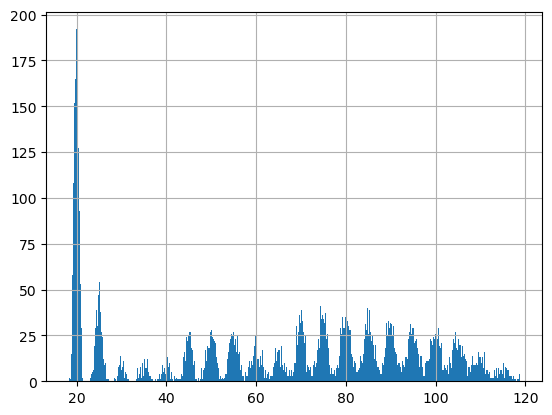

In [21]:
data['MonthlyCharges'].hist(bins=500)

#### TotalCharges

Преобразуем пробелы в нули.

In [22]:
print('Число пробелов до преобразования:', (data['TotalCharges'] == ' ').sum())
print('Число строковых нулей до преобразования:', (data['TotalCharges'] == '0').sum())
data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')
print('Число строковых нулей после преобразования:', (data['TotalCharges'] == '0').sum())

Число пробелов до преобразования: 11
Число строковых нулей до преобразования: 0
Число строковых нулей после преобразования: 11


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  отлично, одно из решений с пропусками в этой задаче

Преобразуем столбец в число.

In [23]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

<AxesSubplot:>

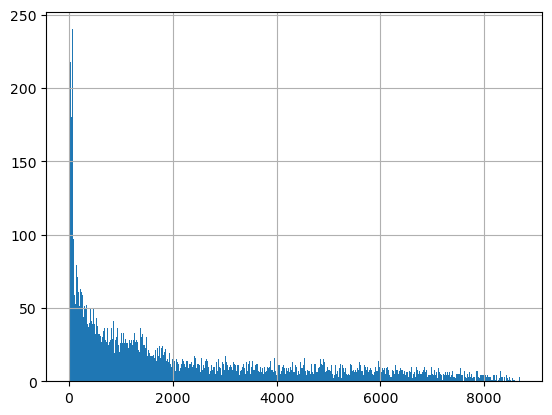

In [24]:
data['TotalCharges'].hist(bins=500)

#### gender

In [25]:
print('Уникальные значения столбца "gender":', data['gender'].unique())

Уникальные значения столбца "gender": ['Female' 'Male']


Преобразуем признак:
 - 'Female' - 1,
 - 'Male' - 0.

In [26]:
data['gender'] = (data['gender'] == 'Female').astype('int')
print('Доля женщин в данных:',data['gender'].mean())

Доля женщин в данных: 0.495243504188556


#### SeniorCitizen

In [27]:
print('Уникальные значения столбца "SeniorCitizen":', data['SeniorCitizen'].unique())
print('Доля пенсионеров в данных:',data['SeniorCitizen'].mean())

Уникальные значения столбца "SeniorCitizen": [0 1]
Доля пенсионеров в данных: 0.1621468124378816


#### Partner

In [28]:
print('Уникальные значения столбца "Partner":', data['Partner'].unique())

Уникальные значения столбца "Partner": ['Yes' 'No']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [29]:
data['Partner'] = (data['Partner'] == 'Yes').astype('int')
print('Доля семейных в данных:', data['Partner'].mean())

Доля семейных в данных: 0.4830327985233565


#### Dependents

In [30]:
print('Уникальные значения столбца "Dependents":', data['Dependents'].unique())

Уникальные значения столбца "Dependents": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [31]:
data['Dependents'] = (data['Dependents'] == 'Yes').astype('int')
print('Доля клиентов с иждевенцами:',data['Partner'].mean())

Доля клиентов с иждевенцами: 0.4830327985233565


#### InternetService

In [32]:
print('Уникальные значения столбца "InternetService":', data['InternetService'].unique())

Уникальные значения столбца "InternetService": ['DSL' 'Fiber optic' nan]


In [33]:
data['InternetService'] = data['InternetService'].fillna('No internet service')
print('Уникальные значения столбца "InternetService":', data['InternetService'].unique())

Уникальные значения столбца "InternetService": ['DSL' 'Fiber optic' 'No internet service']


In [34]:
# data = data.join(pd.get_dummies(data['InternetService'], drop_first=True)).drop(columns='InternetService')

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Убрал строку get_dummies.

После разделения обучающей и тестовой выборок будет применён метод OHE библиотеки sklearn.

#### OnlineSecurity

In [35]:
print('Уникальные значения столбца "OnlineSecurity":', data['OnlineSecurity'].unique())

Уникальные значения столбца "OnlineSecurity": ['No' 'Yes' nan]


In [36]:
data['OnlineSecurity'] = data['OnlineSecurity'].fillna('No')
print('Уникальные значения столбца "OnlineSecurity":', data['OnlineSecurity'].unique())

Уникальные значения столбца "OnlineSecurity": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [37]:
data['OnlineSecurity'] = (data['OnlineSecurity'] == 'Yes').astype('int')
print('Доля пользователей услугой OnlineSecurity:',data['OnlineSecurity'].mean())

Доля пользователей услугой OnlineSecurity: 0.2866676132329973


#### OnlineBackup

In [38]:
print('Уникальные значения столбца "OnlineBackup":', data['OnlineBackup'].unique())

Уникальные значения столбца "OnlineBackup": ['Yes' 'No' nan]


In [39]:
data['OnlineBackup'] = data['OnlineBackup'].fillna('No')
print('Уникальные значения столбца "OnlineBackup":', data['OnlineBackup'].unique())

Уникальные значения столбца "OnlineBackup": ['Yes' 'No']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [40]:
data['OnlineBackup'] = (data['OnlineBackup'] == 'Yes').astype('int')
print('Доля пользователей услугой OnlineBackup:',data['OnlineBackup'].mean())

Доля пользователей услугой OnlineBackup: 0.3448814425670879


#### DeviceProtection

In [41]:
print('Уникальные значения столбца "DeviceProtection":', data['DeviceProtection'].unique())

Уникальные значения столбца "DeviceProtection": ['No' 'Yes' nan]


In [42]:
data['DeviceProtection'] = data['DeviceProtection'].fillna('No')
print('Уникальные значения столбца "DeviceProtection":', data['DeviceProtection'].unique())

Уникальные значения столбца "DeviceProtection": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [43]:
data['DeviceProtection'] = (data['DeviceProtection'] == 'Yes').astype('int')
print('Доля пользователей услугой DeviceProtection:',data['DeviceProtection'].mean())

Доля пользователей услугой DeviceProtection: 0.3438875479199205


#### TechSupport

In [44]:
print('Уникальные значения столбца "TechSupport":', data['TechSupport'].unique())

Уникальные значения столбца "TechSupport": ['No' 'Yes' nan]


In [45]:
data['TechSupport'] = data['TechSupport'].fillna('No')
print('Уникальные значения столбца "TechSupport":', data['TechSupport'].unique())

Уникальные значения столбца "TechSupport": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [46]:
data['TechSupport'] = (data['TechSupport'] == 'Yes').astype('int')
print('Доля пользователей услугой TechSupport:',data['TechSupport'].mean())

Доля пользователей услугой TechSupport: 0.2902172369728809


#### StreamingTV

In [47]:
print('Уникальные значения столбца "StreamingTV":', data['StreamingTV'].unique())

Уникальные значения столбца "StreamingTV": ['No' 'Yes' nan]


In [48]:
data['StreamingTV'] = data['StreamingTV'].fillna('No')
print('Уникальные значения столбца "StreamingTV":', data['StreamingTV'].unique())

Уникальные значения столбца "StreamingTV": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [49]:
data['StreamingTV'] = (data['StreamingTV'] == 'Yes').astype('int')
print('Доля пользователей услугой StreamingTV:',data['StreamingTV'].mean())

Доля пользователей услугой StreamingTV: 0.38435325855459324


#### StreamingMovies

In [50]:
print('Уникальные значения столбца "StreamingMovies":', data['StreamingMovies'].unique())

Уникальные значения столбца "StreamingMovies": ['No' 'Yes' nan]


In [51]:
data['StreamingMovies'] = data['StreamingMovies'].fillna('No')
print('Уникальные значения столбца "StreamingMovies":', data['StreamingMovies'].unique())

Уникальные значения столбца "StreamingMovies": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [52]:
data['StreamingMovies'] = (data['StreamingMovies'] == 'Yes').astype('int')
print('Доля пользователей услугой StreamingMovies:',data['StreamingMovies'].mean())

Доля пользователей услугой StreamingMovies: 0.3879028822944768


#### MultipleLines

In [53]:
print('Уникальные значения столбца "MultipleLines":', data['MultipleLines'].unique())

Уникальные значения столбца "MultipleLines": [nan 'No' 'Yes']


In [54]:
data['MultipleLines'] = data['MultipleLines'].fillna('No')
print('Уникальные значения столбца "MultipleLines":', data['MultipleLines'].unique())

Уникальные значения столбца "MultipleLines": ['No' 'Yes']


Преобразуем признак:
 - 'Yes' - 1,
 - 'No' - 0.

In [55]:
data['MultipleLines'] = (data['MultipleLines'] == 'Yes').astype('int')
print('Доля пользователей услугой MultipleLines:',data['MultipleLines'].mean())

Доля пользователей услугой MultipleLines: 0.42183728524776376


#### Выбор признаков используемых в моделях

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   int64         
 4   PaperlessBilling  7043 non-null   int32         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   int32         
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   int32         
 11  Dependents        7043 non-null   int32         
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   int32         
 14  OnlineBackup      7043 n

In [57]:
X = data.drop(labels=['customerID', 'BeginDate', 'EndDate', 'target'], axis=1)
y = data['target']

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>  тут все верно

In [58]:
X.info()
print(' ')
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   int64  
 1   PaperlessBilling  7043 non-null   int32  
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   int32  
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   int32  
 8   Dependents        7043 non-null   int32  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  MultipleLines     7043 non-null   int32  


#### Проверка на мультиколлинеарность
Перенёс ниже, после разделения выборок на обучающую и тестовую с последующим применением OHE.

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>
<hr>  
<b>Обрати внимание🤔:</b>  Ага, смотри, тут какие моменты.  Линейные модели могут неправильно работать или работать плохо, если есть мультиколлинеарные признаки. Но с линейными моделями нельзя использовать порядковое кодировние, к этому вернёмся далее.
    
Тут же какая ошибка. Ты исследуешь линейные корреляции, которые имеют смысл только для количественных признаков, тут же у нас есть и категориальные. В данном случае нужно исключить категориальные признаки, даже закодированные числами, для них формально к-ты рассчитать можно, но смысла в них не будет никакого. Тогда лучше исследовать корреляции $ \phi k$, которые подходят для тех и тех признаков. По корреляциям советую почитать <a href='https://github.com/hukenovs/coursera_ml_da_specialization/blob/master/C4_Stats_for_data_analysis/Lectures/3-2.Korrelyacii.pdf'>такой материал</a>. Это конспект из специализации Яндекса и МФТИ с Coursera или использовать модуль phik

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Выполнил ниже, после разделения обучающей и тестовой выборок и применения метода OHE.    
Применил для проверки корреляции модуль Phik.

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ок

#### Нормализация признаков

In [59]:
# Перенёс ниже, после разбиения обучающей и тестовой выборок

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>
<hr>  
<b>Обрати внимание🤔:</b> этот пункт нужно перенести как минимум после разбиения на выборки. Если обучить scaler на полной выборке, то он будет содержать в себе и информацию об отложенной выборке, а на то она и отложенная, что как будто её у нас изначально и нет, на момент обучения. 
    
    
Похожая ситуация может и сейчас происходит внутри кросс-валидации. В кросс-валидации данные делятся на несколько частей, поочередно каждая из частей используется внутри как отложенная подвыборка для контроля качества, а остальные используются для обучения модели. Если мы всю подвыборку перед этим отмасштабировали scaler'ом обученным на ней, то он имеет и информацию и о валидационных блоках внутри. Обучение scaler'а должно проходить внутри кросс-валидации, каждый раз заново, на тех же данных, на которых внутри и обучается модель (обучающие блоки обучающей подвыборки). Это касается вообще всех трансформаций, которые мы осуществляем в данных, их лучше помещать в пайплайн (это касается и кодирования категориальных переменных). Тут можешь посмотреть <a href='https://habr.com/ru/company/ods/blog/322534/'>пример работы с ним</a>, вообще ничего страшного, и не только, а <a href='https://newtechaudit.ru/pipeline-v-rabote-s-dannymi/'>тут</a> почитать про пайплайны, <a href='https://scikit-learn.ru/6-1-pipelines-and-composite-estimators/'>адаптация официального руководства sklearn</a>.

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Идея ясна, что касается тестовой выборки, все трансформации, кодирования и дублирования перенёс и выполняю на обучающей выборке.

Трансформации связанные с валидацией всётаки сохранил, по причине большой переработки кода с переводом в пайплайн, боюсь не успеть (то, что по этой причине модель будет хуже обобщать данные понятно, это скажется на качестве предсказания по тестовой выборке, но если качества будет достаточно, то прошу на это закрыть глаза).

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна :) тут надо сесть, почитать и разобраться - довольно небыстрое дело, я приму этот пункт за счет переноса в обучающую, но на будущее лечше сделать через пайплайн

### Создание обучающей и тестовой выборок

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, stratify=y, random_state=RANDOM_STATE)

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> тк у в данных дисбаланс, то рекомендую использовать атрибут stratify - он позволит разбить данные на трайн и тест при этом сохранив баланс классов.
        
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

        
Спасибо, поправил.

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> супер

Создадим DataFrame для обучающей выборки и тестовой выборок

In [61]:
X_train = pd.DataFrame(X_train, columns=X.columns).reset_index(drop=True)
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)

### OHE кодирование признаков PaymentMethod, InternetService

Обучение OHE по тренировочной выборке.
И формирование признаков OHE для тренировочной и тестовой выборок

In [62]:
ohe_PM = OneHotEncoder(drop='first')
transformed_PM_train = ohe_PM.fit_transform(X_train[['PaymentMethod']])
columns_PM = ohe_PM.categories_[0][1:]
df_ohe_PM_train = pd.DataFrame(transformed_PM_train.toarray(), columns=columns_PM)

transformed_PM_test = ohe_PM.transform(X_test[['PaymentMethod']])
df_ohe_PM_test = pd.DataFrame(transformed_PM_test.toarray(), columns=columns_PM)

In [63]:
ohe_IS = OneHotEncoder(drop='first')
transformed_IS_train = ohe_IS.fit_transform(X_train[['InternetService']])
columns_IS = ohe_IS.categories_[0][1:]
df_ohe_IS_train = pd.DataFrame(transformed_IS_train.toarray(), columns=columns_IS)

transformed_IS_test = ohe_IS.transform(X_test[['InternetService']])
df_ohe_IS_test = pd.DataFrame(transformed_IS_test.toarray(), columns=columns_IS)

Объединим признаки OHE с общими датасетами.

In [64]:
X_train = pd.concat([X_train, df_ohe_PM_train], axis=1).drop(columns='PaymentMethod')
X_train = pd.concat([X_train, df_ohe_IS_train], axis=1).drop(columns='InternetService')
print(X_train.shape)

X_test = pd.concat([X_test, df_ohe_PM_test], axis=1).drop(columns='PaymentMethod')
X_test = pd.concat([X_test, df_ohe_IS_test], axis=1).drop(columns='InternetService')
print(X_test.shape)

(5282, 21)
(1761, 21)


<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично, теперь корректно

### Проверка на мультиколлинеарность обучающего датасета

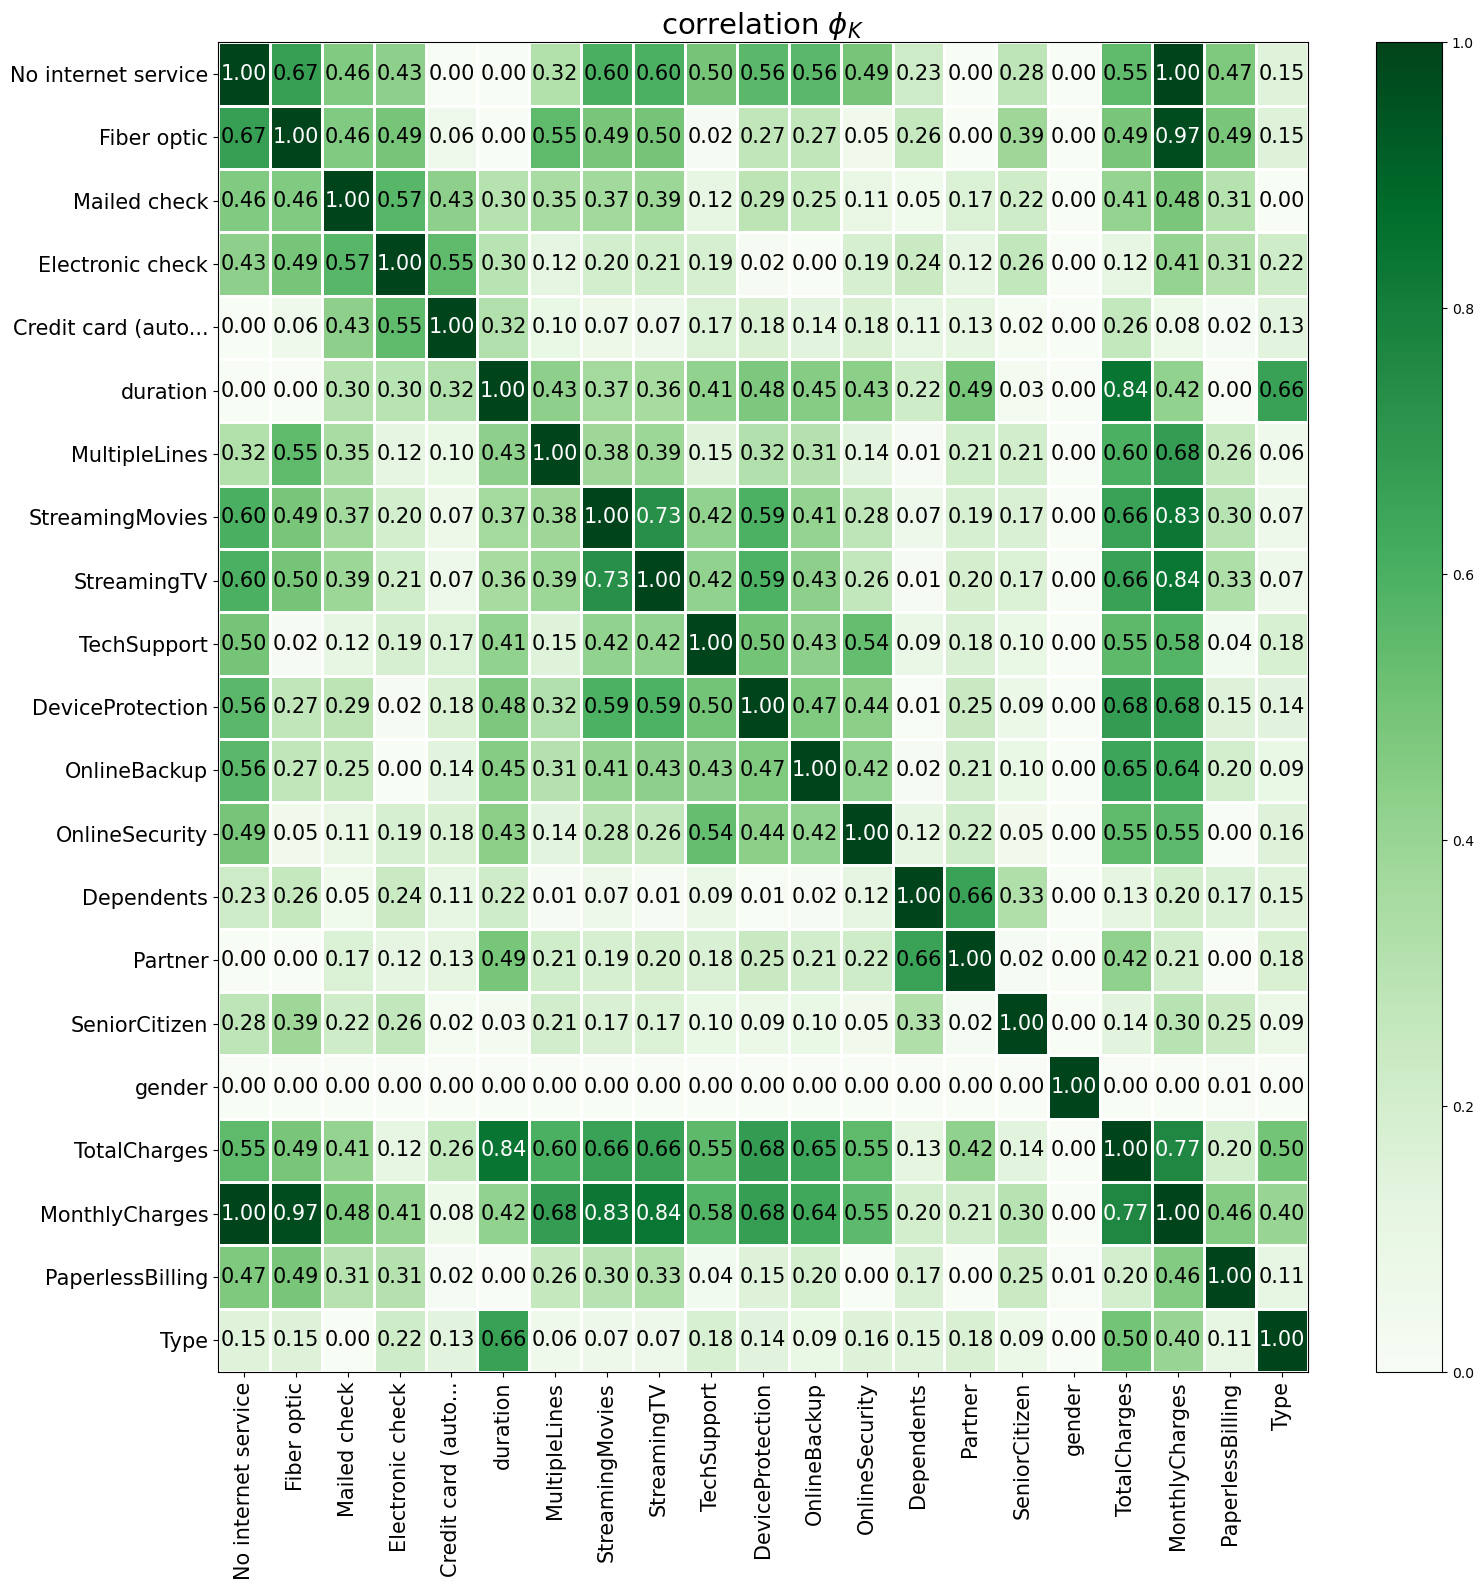

In [65]:
interval_cols = X_train.columns
phik_overview = pd.DataFrame(X_train, columns=interval_cols).phik_matrix(interval_cols=interval_cols)


plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 16))
plt.tight_layout()

Выявлены два признака 'MonthlyCharges' и 'TotalCharges', имеющие очень высокую корреляцию с несколькими признаками, удалим их. 

In [66]:
X_train = X_train.drop(columns=['MonthlyCharges','TotalCharges'])
X_test = X_test.drop(columns=['MonthlyCharges','TotalCharges'])

### Нормализация признаков

In [67]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Scaler обучил только на обучающей выборке, трансформацию сделал также для тестовой.

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

### Устранение дисбаланса обучающей выборки
Применим метод SMOTE.

In [68]:
print('Набор классов при дисбалансе %s' % Counter(y_train))
sm = SMOTE(random_state=RANDOM_STATE)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Набор классов при устранённом дисбалансе %s' % Counter(y_train))

Набор классов при дисбалансе Counter({0: 3880, 1: 1402})
Набор классов при устранённом дисбалансе Counter({0: 3880, 1: 3880})


<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
<hr>  
Сейчас в ходе кросс-валидации происходит утечка данных из-за (апсэмплинга). В ходе (апсэмплинга) объекты редкого класса копируются несколько раз, чтобы выровнять баланс классов в выборке, которая затем перемешивается. Баланс, по сути, будет выравниваться за счёт исходных объектов-дубликатов редкого класса. При SMOTE это конечно не так как если создавать просто дубликаты, но как рекомендация на будущее :)
<br/>
<br/>
<details>
    <summary><u>Сначала вспомним как работает кросс-валидация: (кликабельно)</u></summary>
Данные обучающей выборки делятся на несколько примерно равных частей (блоков, fold'ов)<br/> <img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiMfL8q7_aOzyLOz5zM7JxQuPCYuvoyvlzymMb289XZzQxzuRGFxg2PEQcnc_FEU4XfQtaYj5uoRnZ7w0MPMetjVUut5aIYeuMlQ-Z-XPFyyH-9Yazp0tOgtv6QIrCJl9jTRLqyDpr2YbbY2eSmvN_EflLGQU9JQBNhAjd0uQ9TBRjND4Nmxgenow-s/s813/folds_validation.png'>
<br/>   
Затем каждый из блоков поочередно используется для валидации, в то время как остальные - для обучения. Таким образом, каждый блок побывает валидационным:
<br/>
<img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEi2ufYeIH1JHerkolJ41BkE1CoHCYGW7230ErKTBBbAGlobmGsHuf9MMgPE6KoUObag8stF4tweqkbE0ok4ALlHrthC4PzbBox-S5uuffLIm88SyVOdS4v_4jQxaKP61Gn9tdt8-n3H1l3anx8h0iSHfBVSFmxyKp8KE5WD7ToNNdFKWtnCD5DJ-m2C/s628/splits_validation.png'>
<br/>
Так как в данных есть множество дубликатов объектов из изначально редкого класса, то есть вероятность, что копии одного объекта будут содержаться в валидационном блоке и обучающих, т.е. произойдёт утечка этого объекты, во время валидации он уже не будет новым для модели, она использовала его для обучения. 
<br/>
</details> 
<br/>  
    
<details>
	<summary><u>Покажу на игрушечном примере, лучше один раз увидеть: (кликабельно)</u></summary>
    
В примере приведена задача классификации текстов, это не столь важно, так как это просто пример, это справедливо для объектов любой природы в задаче классификации. Объекты - некоторые уникальные тексты, которые могут быть токсичными или нет (т.е. целевой признак - бинарный, 0 для нетоксичных текстов и 1 для токсичных). На этом примере я хочу показать, как именно в случае апсэмплинга возникает утечка объектов при кросс-валидации.
    
Генерируем 5 уникальных нетоксичных текстов и 20 токсичных, умышленно создаём дисбаланс
    
```python
    X = ['нетоксичный текст' + str(i) for i in range (1, 21)] + ['токсичный текст' + str(i) for i in range (1, 5)]
    y = [0 if 'нетоксичный' in x else 1 for x in X]
```
    
Обернём фичи в pd.Series-объекты для удобства:
    
```python
    X = pd.Series(X)
    y = pd.Series(y)
    X, y
```
    
```
(0      нетоксичный текст1
 1      нетоксичный текст2
 2      нетоксичный текст3
 3      нетоксичный текст4
 4      нетоксичный текст5
 5      нетоксичный текст6
 6      нетоксичный текст7
 7      нетоксичный текст8
 8      нетоксичный текст9
 9     нетоксичный текст10
 10    нетоксичный текст11
 11    нетоксичный текст12
 12    нетоксичный текст13
 13    нетоксичный текст14
 14    нетоксичный текст15
 15    нетоксичный текст16
 16    нетоксичный текст17
 17    нетоксичный текст18
 18    нетоксичный текст19
 19    нетоксичный текст20
 20       токсичный текст1
 21       токсичный текст2
 22       токсичный текст3
 23       токсичный текст4
 dtype: object,
```
    
```
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    1
 21    1
 22    1
 23    1
 dtype: int64)
```

Мы умышленно создали дисбаланс в задаче, сбалансируем апсэмплингом редкий класс токсичных текстов. Как ты знаешь, объекты редкого класса скопируются, в данных появятся дубликаты объектов редкого класса, которые выровняют баланс
    
```python
X, y = upsample(X, y, 5) #upsample - некоторая функция, которая выполняет апсэмплинг объектов редкого класса
```

Посмотрим на данные бывшего редкого класса после балансировки
    
```python
X[y == 1]
```
    
```
20    токсичный текст1
21    токсичный текст2
21    токсичный текст2
20    токсичный текст1
21    токсичный текст2
23    токсичный текст4
22    токсичный текст3
20    токсичный текст1
20    токсичный текст1
22    токсичный текст3
23    токсичный текст4
22    токсичный текст3
23    токсичный текст4
23    токсичный текст4
20    токсичный текст1
22    токсичный текст3
23    токсичный текст4
21    токсичный текст2
21    токсичный текст2
22    токсичный текст3
dtype: object
```
    
Есть дубликаты, ведь так работает апсэмплинг с редким классом. А теперь посмотрим, как данные разделяются на блоки в ходе кросс-валидации. Данные поделим на 5 частей, поочередно каждая часть будет выделяться для валидации, а остальные части - для обучения. Визуализируем тексты для обучения и валидации, найдя те из них, которые «утекли», есть в валидационных и обучаюих данных.

```python
kf = KFold(n_splits=5)

KFold(n_splits=5, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X):
    print('Новый блок выбран валидационным')
    
    #визуализируем объекты для обучения и валидации при текущем выборе валидационного блока
        
    print("Объекты для обучения:", X.iloc[train_index].values, '\n', 
          "Объекты для валидации:", X.iloc[test_index].values)
    
    #смотрим пересечение множеств объектов текущего валидационного блока и блоков для обучения
    
    print('Утекли объекты:', set(X.iloc[train_index]) & set(X.iloc[test_index]), '\n')
```
```
Новый блок выбран валидационным
Объекты для обучения: ['нетоксичный текст1' 'нетоксичный текст5' 'нетоксичный текст13'
 'токсичный текст2' 'нетоксичный текст16' 'нетоксичный текст9'
 'токсичный текст4' 'токсичный текст3' 'токсичный текст1'
 'токсичный текст1' 'нетоксичный текст8' 'нетоксичный текст7'
 'токсичный текст3' 'нетоксичный текст18' 'нетоксичный текст11'
 'нетоксичный текст14' 'нетоксичный текст12' 'токсичный текст4'
 'нетоксичный текст19' 'нетоксичный текст17' 'токсичный текст3'
 'токсичный текст4' 'токсичный текст4' 'нетоксичный текст10'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1']
Утекли объекты: {'токсичный текст2', 'токсичный текст1'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'токсичный текст1'
 'токсичный текст1' 'нетоксичный текст8' 'нетоксичный текст7'
 'токсичный текст3' 'нетоксичный текст18' 'нетоксичный текст11'
 'нетоксичный текст14' 'нетоксичный текст12' 'токсичный текст4'
 'нетоксичный текст19' 'нетоксичный текст17' 'токсичный текст3'
 'токсичный текст4' 'токсичный текст4' 'нетоксичный текст10'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['нетоксичный текст1' 'нетоксичный текст5' 'нетоксичный текст13'
 'токсичный текст2' 'нетоксичный текст16' 'нетоксичный текст9'
 'токсичный текст4' 'токсичный текст3']
Утекли объекты: {'токсичный текст2', 'токсичный текст3', 'токсичный текст4'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'нетоксичный текст1'
 'нетоксичный текст5' 'нетоксичный текст13' 'токсичный текст2'
 'нетоксичный текст16' 'нетоксичный текст9' 'токсичный текст4'
 'токсичный текст3' 'нетоксичный текст12' 'токсичный текст4'
 'нетоксичный текст19' 'нетоксичный текст17' 'токсичный текст3'
 'токсичный текст4' 'токсичный текст4' 'нетоксичный текст10'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['токсичный текст1' 'токсичный текст1' 'нетоксичный текст8'
 'нетоксичный текст7' 'токсичный текст3' 'нетоксичный текст18'
 'нетоксичный текст11' 'нетоксичный текст14']
Утекли объекты: {'токсичный текст3', 'токсичный текст1'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'нетоксичный текст1'
 'нетоксичный текст5' 'нетоксичный текст13' 'токсичный текст2'
 'нетоксичный текст16' 'нетоксичный текст9' 'токсичный текст4'
 'токсичный текст3' 'токсичный текст1' 'токсичный текст1'
 'нетоксичный текст8' 'нетоксичный текст7' 'токсичный текст3'
 'нетоксичный текст18' 'нетоксичный текст11' 'нетоксичный текст14'
 'нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3'] 
 Объекты для валидации: ['нетоксичный текст12' 'токсичный текст4' 'нетоксичный текст19'
 'нетоксичный текст17' 'токсичный текст3' 'токсичный текст4'
 'токсичный текст4' 'нетоксичный текст10']
Утекли объекты: {'токсичный текст3', 'токсичный текст4'} 

Новый блок выбран валидационным
Объекты для обучения: ['токсичный текст1' 'нетоксичный текст20' 'нетоксичный текст3'
 'токсичный текст2' 'нетоксичный текст6' 'токсичный текст2'
 'нетоксичный текст4' 'токсичный текст1' 'нетоксичный текст1'
 'нетоксичный текст5' 'нетоксичный текст13' 'токсичный текст2'
 'нетоксичный текст16' 'нетоксичный текст9' 'токсичный текст4'
 'токсичный текст3' 'токсичный текст1' 'токсичный текст1'
 'нетоксичный текст8' 'нетоксичный текст7' 'токсичный текст3'
 'нетоксичный текст18' 'нетоксичный текст11' 'нетоксичный текст14'
 'нетоксичный текст12' 'токсичный текст4' 'нетоксичный текст19'
 'нетоксичный текст17' 'токсичный текст3' 'токсичный текст4'
 'токсичный текст4' 'нетоксичный текст10'] 
 Объекты для валидации: ['нетоксичный текст15' 'токсичный текст1' 'токсичный текст3'
 'токсичный текст4' 'нетоксичный текст2' 'токсичный текст2'
 'токсичный текст2' 'токсичный текст3']
Утекли объекты: {'токсичный текст3', 'токсичный текст1', 'токсичный текст2', 'токсичный текст4'}
```

Как видишь, так возникает утечка.
</details>    
    
<hr>
Чтобы избежать истории с утечкой, нужно проводить upsampling внутри кросс-валидации, для этого можно использовать <a href='https://www.helenkapatsa.ru/paiplain/'>пайплайны</a> (<a href='https://scikit-learn.org/stable/modules/compose.html#pipeline'>руководство пользователя sklearn</a>). Или использовать другие способы решения проблемы несбалансированности выборки.
</div></div>

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

        
Спасибо, как на будущее принял. Идея с трансформациями на данных включающих валидационный и тестовый набор ясна полностью.
- Для тестовой выборки, она полностью недопустима (так как данные отсутствуют на руках),
- для валидационной нежелательна (так как ухудшает обобщающую способность модели, модель подстраивается под валидацию).

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> все верно :)

## Создание моделей

### LogisticRegression

In [69]:
lr=LogisticRegression()
parameters = {'C':[C/100 for C in range(1, 10000, 20)]}
model_LR = GridSearchCV(estimator = lr, 
                        param_grid=parameters,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1
                        )

In [70]:
%%time
model_LR.fit(X_train,y_train)

CPU times: total: 1.19 s
Wall time: 4.48 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41,
                               1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01,
                               3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.81, 5.01, 5.21, 5.41, 5.61, 5.81, ...]},
             scoring='roc_auc')

In [71]:
print('Метрика ROC_AUC на лучшей модели при кроссвалидации:', model_LR.cv_results_['mean_test_score'].max())
print('Метрика ROC_AUC на лучшей модели при кроссвалидации:', model_LR.best_score_)

Метрика ROC_AUC на лучшей модели при кроссвалидации: 0.852818112976937
Метрика ROC_AUC на лучшей модели при кроссвалидации: 0.852818112976937


<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> лучшую метрику лучше выводить best_score_. Сейчас у тебя идет усреднение по всем прогоняемым моделям, что не отражает твой лучший score

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

        
Он выдаёт тоже значение. Но запись значительно короче, поправил для всех моделей.

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> да, я не заметила, что ты максимизируешь результат. Но теперь стало лаконичней:)

### RandomForestClassifier

In [72]:
rf = RandomForestClassifier(class_weight=None, random_state=RANDOM_STATE)
parameters = {'n_estimators':[est for est in range(600, 801, 100)], 'max_depth':[max_depth for max_depth in range(2, 8, 1)]}
model_RF = GridSearchCV(estimator = rf, 
                        param_grid=parameters,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1
                        )

In [73]:
%%time
model_RF.fit(X_train,y_train)

CPU times: total: 1.91 s
Wall time: 20 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=120922),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [600, 700, 800]},
             scoring='roc_auc')

In [74]:
print('Метрика ROC_AUC на лучшей модели при кроссвалидации:', model_RF.best_score_)

Метрика ROC_AUC на лучшей модели при кроссвалидации: 0.8990986024019556


### CatBoostClassifier

In [75]:
cb = CatBoostClassifier(loss_function='Logloss', random_state=RANDOM_STATE)
parameters = {'learning_rate': [learning_rate/10 for learning_rate in range(2, 5, 1)],
              'depth': [depth for depth in range(2, 4, 1)],
              'l2_leaf_reg': [1, 2],
              'iterations':[1000]}
model_CB = GridSearchCV(estimator = cb, 
                        param_grid=parameters,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1
                        )

In [76]:
%%time
model_CB.fit(X_train,y_train)

0:	learn: 0.6152436	total: 116ms	remaining: 1m 55s
1:	learn: 0.5680377	total: 118ms	remaining: 58.7s
2:	learn: 0.5444983	total: 119ms	remaining: 39.6s
3:	learn: 0.5273570	total: 121ms	remaining: 30.1s
4:	learn: 0.5101247	total: 122ms	remaining: 24.3s
5:	learn: 0.4985454	total: 124ms	remaining: 20.5s
6:	learn: 0.4850294	total: 126ms	remaining: 17.9s
7:	learn: 0.4782665	total: 127ms	remaining: 15.8s
8:	learn: 0.4713122	total: 129ms	remaining: 14.2s
9:	learn: 0.4682448	total: 131ms	remaining: 12.9s
10:	learn: 0.4635847	total: 132ms	remaining: 11.9s
11:	learn: 0.4604182	total: 133ms	remaining: 11s
12:	learn: 0.4527578	total: 135ms	remaining: 10.3s
13:	learn: 0.4437076	total: 137ms	remaining: 9.63s
14:	learn: 0.4366324	total: 138ms	remaining: 9.08s
15:	learn: 0.4282880	total: 140ms	remaining: 8.6s
16:	learn: 0.4248197	total: 141ms	remaining: 8.18s
17:	learn: 0.4229367	total: 143ms	remaining: 7.79s
18:	learn: 0.4206981	total: 144ms	remaining: 7.45s
19:	learn: 0.4185282	total: 146ms	remaining

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000187B1E52200>,
             n_jobs=-1,
             param_grid={'depth': [2, 3], 'iterations': [1000],
                         'l2_leaf_reg': [1, 2],
                         'learning_rate': [0.2, 0.3, 0.4]},
             scoring='roc_auc')

In [77]:
print('Метрика ROC_AUC на лучшей модели при кроссвалидации:', model_CB.best_score_)

Метрика ROC_AUC на лучшей модели при кроссвалидации: 0.9736148567860559


### LGBMClassifier

In [78]:
lgbm = LGBMClassifier(learning_rate=0.1, random_state=RANDOM_STATE)
parameters = {'n_estimators':[it for it in range(600, 801, 100)],
              'max_depth':[max_depth for max_depth in range(2, 8, 1)],
              'min_child_samples':[min_child_samples for min_child_samples in range(100, 141, 10)]}
model_LGBM = GridSearchCV(estimator = lgbm, 
                        param_grid=parameters,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1
                        )

In [79]:
%%time
model_LGBM.fit(X_train,y_train)

CPU times: total: 5.78 s
Wall time: 25.3 s


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=120922), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_child_samples': [100, 110, 120, 130, 140],
                         'n_estimators': [600, 700, 800]},
             scoring='roc_auc')

In [80]:
print('Метрика ROC_AUC на лучшей модели при кроссвалидации:', model_LGBM.best_score_)

Метрика ROC_AUC на лучшей модели при кроссвалидации: 0.9540901663301093


### PyTorch

In [81]:
X_train_tensor = torch.tensor(X_train.astype('float32'))
y_train_tensor = torch.tensor(y_train.values).type(torch.LongTensor)

_, X_valid, _, y_valid = train_test_split(X_train, y_train, shuffle=True, test_size=0.25, random_state=RANDOM_STATE)
X_valid_tensor = torch.tensor(X_valid.astype('float32'))
y_valid_tensor = torch.tensor(y_valid.values).type(torch.LongTensor)

In [82]:
train = data_utils.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = data_utils.DataLoader(train, batch_size=256, shuffle=True)

In [83]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1],46)
        self.fc2 = nn.Linear(46,12)
        self.fc3 = nn.Linear(12,24)    
        self.fc4 = nn.Linear(24,4)
        self.fc5 = nn.Linear(4,8)
        self.fc6 = nn.Linear(8,2)
        self.sm = nn.Softmax(dim=1)
    
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.fc6(x)
        return x
    
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)

In [84]:
%%time
model_PT = Net().to(device_gpu)
optimizer = torch.optim.Adam(model_PT.parameters(),lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(500):
    loss_array = np.array([], dtype=float)
    for i, batch in enumerate(train_loader):
        optimizer.zero_grad()
        X_batch, y_batch = batch
        X_batch = X_batch.to(device_gpu)
        y_batch = y_batch.to(device_gpu)
        output = model_PT.forward(X_batch)
        loss =loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
        loss_array = np.append(loss_array, loss.to(device_cpu).detach().numpy())
    test_pred = model_PT.forward(X_valid_tensor.to(device_gpu))
    test_pred = test_pred.argmax(dim=1).to(device_cpu)
    print(f'Epoch: {epoch}, loss: {loss_array.mean()}, ROC_AUC: {roc_auc_score(y_valid_tensor, test_pred)}')

Epoch: 0, loss: 0.7103329627744613, ROC_AUC: 0.5
Epoch: 1, loss: 0.7085143135439965, ROC_AUC: 0.5
Epoch: 2, loss: 0.7056462207148152, ROC_AUC: 0.5
Epoch: 3, loss: 0.7044146560853527, ROC_AUC: 0.5
Epoch: 4, loss: 0.7031749352332084, ROC_AUC: 0.5
Epoch: 5, loss: 0.7009169497797566, ROC_AUC: 0.5
Epoch: 6, loss: 0.6992146891932334, ROC_AUC: 0.5
Epoch: 7, loss: 0.6964975960793034, ROC_AUC: 0.5
Epoch: 8, loss: 0.6936054883464691, ROC_AUC: 0.5
Epoch: 9, loss: 0.6894639615089663, ROC_AUC: 0.5
Epoch: 10, loss: 0.6847576114439196, ROC_AUC: 0.5
Epoch: 11, loss: 0.6791630906443442, ROC_AUC: 0.5
Epoch: 12, loss: 0.6726850425043414, ROC_AUC: 0.5
Epoch: 13, loss: 0.6657142869887813, ROC_AUC: 0.5678854409589407
Epoch: 14, loss: 0.6579156517982483, ROC_AUC: 0.7235442181862266
Epoch: 15, loss: 0.6485524908188851, ROC_AUC: 0.7564950429139138
Epoch: 16, loss: 0.6393856963803691, ROC_AUC: 0.7615504944325167
Epoch: 17, loss: 0.6303534680797208, ROC_AUC: 0.7597177071602591
Epoch: 18, loss: 0.6201402756475634

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> по алгоритмам все верно, классно, что сделал нейронную сеть

### Проврека лучшей модели
Наибольшее значение метрики AUC_ROC на валидации показала модель CatBoostClassifier.
Обучим её на полной обучающей выборке и проверим качество на тестовой выборке.

In [85]:
model = model_CB.best_estimator_

In [86]:
%%time
model.fit(X_train, y_train)

0:	learn: 0.6152436	total: 1.46ms	remaining: 1.45s
1:	learn: 0.5680377	total: 3ms	remaining: 1.5s
2:	learn: 0.5444983	total: 4.36ms	remaining: 1.45s
3:	learn: 0.5273570	total: 5.74ms	remaining: 1.43s
4:	learn: 0.5101247	total: 7.22ms	remaining: 1.44s
5:	learn: 0.4985454	total: 8.67ms	remaining: 1.44s
6:	learn: 0.4850294	total: 10.2ms	remaining: 1.45s
7:	learn: 0.4782665	total: 11.6ms	remaining: 1.43s
8:	learn: 0.4713122	total: 13ms	remaining: 1.43s
9:	learn: 0.4682448	total: 14.4ms	remaining: 1.42s
10:	learn: 0.4635847	total: 15.8ms	remaining: 1.42s
11:	learn: 0.4604182	total: 17.2ms	remaining: 1.41s
12:	learn: 0.4527578	total: 18.8ms	remaining: 1.43s
13:	learn: 0.4437076	total: 20.4ms	remaining: 1.44s
14:	learn: 0.4366324	total: 22ms	remaining: 1.44s
15:	learn: 0.4282880	total: 23.6ms	remaining: 1.45s
16:	learn: 0.4248197	total: 25.1ms	remaining: 1.45s
17:	learn: 0.4229367	total: 26.6ms	remaining: 1.45s
18:	learn: 0.4206981	total: 28ms	remaining: 1.45s
19:	learn: 0.4185282	total: 29.7

In [87]:
%%time
predict = model.predict_proba(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>
<hr>  
<b>Обрати внимание🤔:</b> для roc_auc_score нужно использовать вероятность старшего класса, исправь пожалуйста. Метод predict_proba

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

        
Спасибо за замечание, исправил.

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

In [88]:
print(f'Значение ROC_AUC на тестовой выборке: {roc_auc_score(y_test, predict[:,1])}')

Значение ROC_AUC на тестовой выборке: 0.9510084428543533


- Получена модель CatBoostClassifier, дающее на тестовой выборке качество ROC_AUC 0.951.
- Время обучения модели на тренировочных данных: 1.67 s на процессоре AMD Ryzen 5 3600X 6-Core Processor 3.8 GHz.
- Время предсказания близко к 0.


<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Денис</b>, ты молодец, очень хорошая работа по алгоритмам, нейронки в финальном проекте пока только у тебя. Осталось доработать по комментариям и отлично :)

<br/>
<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

        
Спасибо за ценные указания. Устранил утечки данных из тестовой выборки в обучающую.
    
Осталась утечка данных при кросс-валидации, что должно ухудшить результат на тесте, но даже при этом итоговое значение ROC_AUC значительно превышает требование техзадания (вероятно есть ещё какие-то утечки из тестовой выборки, но я их не вижу).

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Денис</b>, по данным утечки не вижу (в плане признаков), остается кросс-валидация. Критичные моменты и даже рекомендование ты исправил, молодец. Метрика у тебя оооочень высокая, ты получаешь 6 sp. Я сейчас приму проект как есть, в будущем ты сможешь доработать через пайплайн:) Можно делать отчет!

## Отчёт по проекту.

### Поставленная задача.
Задачай проекта является получение прогноза по уходу клиента, с целью удержания его предложением специальных условий. Метрика качества задана ROC_AUC.

### Входные данные.
Входные данные представлены в 4-х CSV таблицах, содержащих:
- основные параметры пользователя,
- условия договора,
- потребляемые услуги (интернет, телефония).

### Предпологавшийся план решения задачи.
Предполагался следующий план работы:
- предобработка данных (приведение типов, создание таблиц признаков, выделение целевого признака, проверка целевого признака на дисбаланс, проверка распределений, удаление выбросов, проведение нормализацию признаков, проверка на мультиколлинеарность признаков, с принятием решения по удалению каких то полей,
- выделение обучающей и тестовой выборок(75/25),
- создание нескольких моделей с подбором гипперпараметров на кросс-валидации: LogisticRegression, RandomForestClassifier, CatBoostClassifier, LGBMClassifier, PyTorch(Linear),
- обучение лучшей модели на обучающей выборке, с замером времени обучения,
- проверка лучшей модели по качеству предсказания на тестовой выборке.

### Фактическое решение задачи.

#### Загрузка данных.
- загрузка данных,
- описание признаков,
- объединение всех таблиц по признаку customerID,

#### Создание признаков.
- Приведение типов данных для временных параметров, получение признака `duration` (время действия договора),
- выделение целевого признака из временного признака `EndDate`, факт расторжения договора определяется наличием даты окончания действия договора, проверка признака на дисбаланс классов,
- перевод бинарных категориальных признаков к виду [0, 1],
- разбиение данных на обучающую и тестовую выборки в соотношении 75/25,
- кодирование категориальных признаков методом OneHotEncoding, метод fit() применялся только для обучающей выборки,
- проверка признаков на мультиколлинеарность библиотекой Phik, удаление зависимых признаков `MonthlyCharges`,`TotalCharges`,
- нормализация признаков методом MinMaxScaler, метод fit() применялся только для обучающей выборки,
- устранение дисбаланса классов в обучающей выборке, применён метод SMOTE.

#### Создание и обучение моделей.
- созданы следующие модели: LogisticRegression, RandomForestClassifier, CatBoostClassifier, LGBMClassifier, PyTorch(Linear),
- для побдора гиперпарметров ML моделей применена оценка на кросс-валидации,
- для оценки качества нейросети использована случайная выборка размером 25% из обучающей выборки.

#### Тест лучшей модели.
Лучшая модель определена на этапе валидации, ей оказалась `CatBoostClassifier` со значение ROC_AUC 0,97 на кросс-валидации.

Параметры модели:
- loss_function - 'Logloss',
- depth - 2,
- iterations - 1000,
- learning_rate - 0.2.

Результат работы модели:
- метрика ROC_AUC на тестовой выборке 0,951,
- время обучения модели на тренировочных данных: 1.67 s на процессоре AMD Ryzen 5 3600X 6-Core Processor 3.8 GHz.
- время предсказания близко к 1 ms.

Модель выделила 2 наиболее важных признака с наибольшими весами:
- Dependents,
- No InternetService (InternetService).

### Задруднения и недостатки в решении.
- при подборе гиперпараметров модели на кросс-валидации происходит утечка данных через устранение дисбаланса методом SMOTE и нормализацию данных MinMax, который производятся для всей обучающей выборки перед разбиением на фолды,
- для решения проблемы утечки данных при валидации требуется применение техники pipeline и производить обучение и трансформацию признаков непосредственно перед подачей в модель на фолдах.